In [152]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import utils

SyntaxError: invalid syntax (utils.py, line 7)

In [2]:
X = sio.loadmat("data1.mat")
X = X["X"]

In [3]:
np.std(X-np.mean(X,axis=0), axis=0)

array([1.16126017, 1.01312201])

In [4]:
def normalize(X):
    mean = np.mean(X,axis=0)
    Xnorm = X-mean
    std = np.std(Xnorm, axis=0)
    Xnorm = Xnorm/std
    
    result = [Xnorm, mean, std]
    return result
    

In [5]:
result = normalize(X)

In [21]:
Xnorm = result[0]
mu = result[1]
std = result[2]

In [70]:
def pca(X):
    E = np.dot(np.transpose(X), X)/len(X)
    u, s, v = np.linalg.svd(E)
    return u, s, v

In [71]:
u, s, v= pca(Xnorm)

In [98]:
def drawLine(p1, p2):
    plt.plot([p1[0], p2[0]],[p1[1], p2[1]])

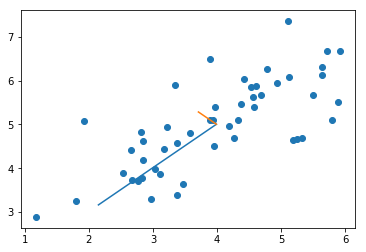

In [99]:
plt.scatter(X[:,0], X[:,1])
drawLine(mu, (mu + 1.5 * s[0] * np.transpose(u[:,0])))
drawLine(mu, (mu + 1.5 * s[1] * np.transpose(u[:,1])))
plt.show()

In [159]:
def projectData(X, u, K):
    ured = u[:,0:K]
    z = X @ ured
    return z
def recoverData(z, u, K):
    X_rec = z @ np.transpose(u[:, 0:K])
    return X_rec

In [129]:
z = projectData(Xnorm, u, 1)
xrec = recoverData(z, u, 1)

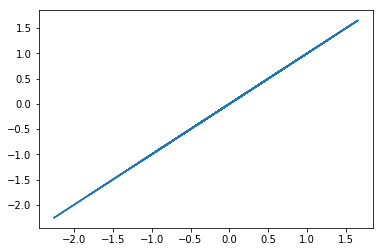

In [130]:
plt.plot(xrec[:,0], xrec[:,1])

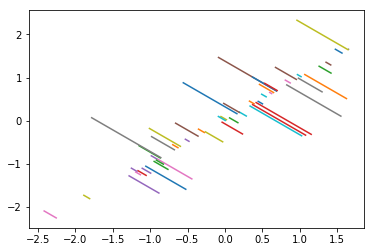

In [137]:
for i in range(len(Xnorm)):
    drawLine(Xnorm[i,:], xrec[i,:]);



# FACES DATA

In [138]:
X = sio.loadmat("faces.mat")
X = X["X"]

In [140]:
X.shape

(5000, 1024)

In [141]:
temp = normalize(X)
Xnorm = temp[0]
mu = temp[1]
sigma = temp[2]

In [143]:
u, s, v = pca(Xnorm)

In [160]:
z = projectData(Xnorm, u, 100)
xrec = recoverData(z, u, 100)

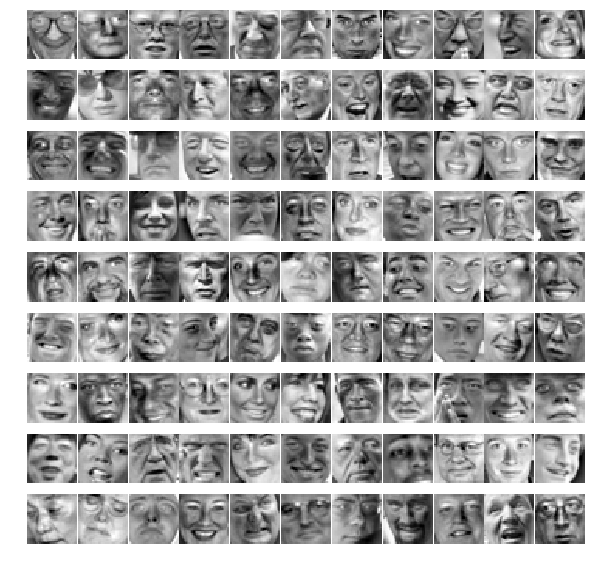

In [157]:
displayData(Xnorm[0:99, :])

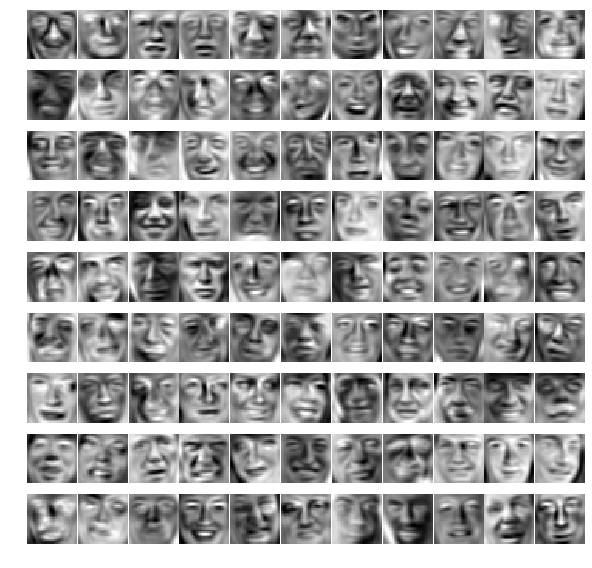

In [161]:
displayData(xrec[0:99, :])

In [155]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data in a nice grid.

    Parameters
    ----------
    X : array_like
        The input data of size (m x n) where m is the number of examples and n is the number of
        features.

    example_width : int, optional
        THe width of each 2-D image in pixels. If not provided, the image is assumed to be square,
        and the width is the floor of the square root of total number of pixels.

    figsize : tuple, optional
        A 2-element tuple indicating the width and height of figure in inches.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = int(n / example_width)

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_height, example_width, order='F'), cmap='gray')
        ax.axis('off')

